# Sheet 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (12 / 2.54, 6 / 2.54)
plt.rcParams['figure.constrained_layout.use'] = True

## Bayes: Signal or Noise?

Using Bayes theorem
$$ \begin{aligned}
    p(x, y) &= p(x \mid y) \cdot p(y) = p(y \mid x) \cdot p(x) \\
    p(x) &= p(x \mid y) \cdot p(y) + p(x \mid y') \cdot p(y')
\end{aligned} $$

we can write
$$ p(\text{gamma ray} \mid \text{target direction}) = p(\text{target direction} \mid \text{gamma ray}) \cdot \frac{p(\text{gamma ray})}{p(\text{target direction})} $$
where
$$ \begin{aligned}
    p(\text{target direction}) &= p(\text{target direction} \mid \text{gamma ray}) \cdot p(\text{gamma ray}) \\
    &+\, p(\text{target direction} \mid \text{background}) \cdot p(\text{background}) \\
    &= 0.95 \cdot 0.1 + 0.1 \cdot 0.9 \\
    &= 0.185.
\end{aligned}$$

Inserting the given values, it follows that
$$
  p(\text{gamma ray} \mid \text{target direction}) = 0.95 \cdot \frac{0.1}{0.185} \approx 0.514.
$$

## Bayes Classifiers

### (a)

The expected loss for a single value is
$$
  \mathbb{E}_{Y \mid X=x} L(Y, f(x)) = \cancel{0 \cdot p(f(x) \mid x)} + \begin{cases}
      10 \cdot p(y = 1 \mid x) & \text{if}\ f(x) = 0, \\
      1 \cdot p(y = 0 \mid x) & \text{otherwise}.
  \end{cases}
$$

The classifier should thus prefer $f(x) = 0$ if the loss in the top case is less than the loss in the bottom case. With $\sum_y p(y \mid x) = 1$, this can be written as

$$ \begin{aligned}
  f(x) &= \begin{cases}
      0 & \text{if}\ 10 \cdot p(y = 1 \mid x) < p(y = 0 \mid x), \\
      1 & \text{otherwise}
  \end{cases} \\
  &= \begin{cases}
      0 & \text{if}\ p(y = 0 \mid x) > \frac{10}{11}, \\
      1 & \text{otherwise}.
  \end{cases}
\end{aligned} $$


The higher loss directly goes into the "confidence" required to classify a sample as class 0. The decision boundary then is not at $p(y = 0 \mid x) = 0.5$ anymore, but at $p(y = 0 \mid x) = 10/11$.

This kind of loss matrix is useful in "better safe than sorry" contexts, where false positives are more acceptable than false negatives (or the other way around).

### (b)

The expected loss in this case is

$$
    \mathbb{E}_{Y \mid X=x} L(Y, f(x)) = \cancel{0 \cdot p(f(x) \mid x)} + \sum_{\substack{y\in Y \setminus f(x)}}^k \begin{cases}
        \alpha \cdot p(y \mid x) & \text{if}\ f(x) = 0, \\
        1 \cdot p(y \mid x) & \text{otherwise}.
    \end{cases}
$$

With $\sum_{y=1}^k p(y \mid x) = 1$ and $p(y=0 \mid x) = 0$, this can be simplified to
$$
    \mathbb{E}_{Y \mid X=x} L(Y, f(x)) = \begin{cases}
        \alpha & \text{if}\ f(x) = 0, \\
        1 - p(f(x) \mid x) & \text{otherwise}.
    \end{cases}
$$

The bottom case looks the same as for 0-1 loss, so we can define the classifier $f(x)$ as
$$
    f(x) = \begin{cases}
        0 & \text{if}\ 1 - \alpha > \max_y p(y \mid x), \\
        \mathrm{arg\,max}_y\, p(y \mid x) & \text{otherwise}.
    \end{cases}
$$

The $\alpha$ value describes a kind of confidence threshold: If the most likely class has a probability of less than $1-\alpha$, the classifier will reject the sample instead.

This kind of classifier is useful when handling data with outliers, or again when a wrong classification has bad consequences.

## QDA

In [2]:
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

### (a)

In [3]:
classes = np.unique(labels)
means = np.array([np.mean(pts[labels == c]) for c in classes])
stds = np.array([np.std(pts[labels == c]) for c in classes])

### (b)

In [4]:
def gaussian(x, mean, std):
    return np.exp(-(x-mean)**2 / (2*std**2)) / (np.sqrt(2*np.pi) * std)

In [5]:
x = np.linspace(-10, 10, 500)
priors = np.array([1/2, 1/2])
likelihoods = gaussian(x, means[:, np.newaxis], stds[:, np.newaxis])
posteriors = priors[:, np.newaxis] * likelihoods
posteriors /= np.sum(posteriors, axis=0) # sum over classes

In [6]:
mask = (x > -2) & (x < 5)
boundary = np.abs(posteriors[0] - 0.5)[mask].argmin()
print(f"Decision boundary: {x[mask][boundary]:.2f}")

Decision boundary: 1.18


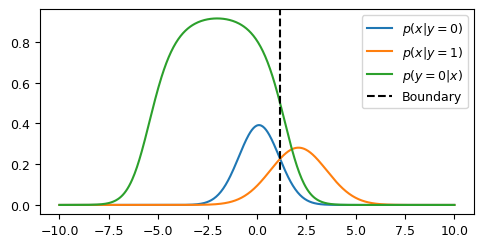

In [7]:
for label, likelihood in zip(classes, likelihoods):
    plt.plot(x, likelihood, label=f"$p(x|y={label:.0f})$")

plt.plot(x, posteriors[0], label="$p(y=0|x)$")
plt.axvline(x[mask][boundary], c='k', ls='--', label='Boundary')

plt.legend()
plt.show()

The decision boundary is exactly at the intersection of the two Gaussians.

In [8]:
priors = np.array([2/3, 1/3])
posteriors = priors[:, np.newaxis] * likelihoods
posteriors /= np.sum(posteriors, axis=0)

In [9]:
mask = (x > -2) & (x < 5)
boundary = np.abs(posteriors[0] - 0.5)[mask].argmin()
print(f"Decision boundary: {x[mask][boundary]:.2f}")

Decision boundary: 1.62


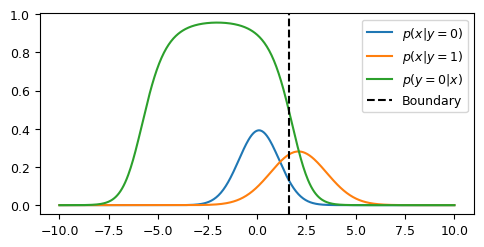

In [10]:
for label, likelihood in zip(classes, likelihoods):
    plt.plot(x, likelihood, label=f"$p(x|y={label:.0f})$")
    
plt.plot(x, posteriors[0], label="$p(y=0|x)$")
plt.axvline(x[mask][boundary], c='k', ls='--', label='Boundary')

plt.legend()
plt.show()

When class 0 is given a higher prior probability, the decision boundary is moved to the right, so that more points are classified as class 0.

## Trees and Random Forests

### (a)

In [11]:
def gini(split):
    p = split / np.sum(split)
    return 1 - np.sum(p**2, axis=0)

def entropy(split):
    p = split / np.sum(split)
    return -np.sum(p * np.log2(p, where=(p != 0)), axis=0)

def misclassification(split):
    p = split / np.sum(split)
    return 1 - np.max(p, axis=0)

def compute_split_measure(func, root, left, right):
    return func(root) - left.sum() / root.sum() * func(left) \
                      - right.sum() / root.sum() * func(right)

#### Split A

In [12]:
root  = np.array([400, 400])
left  = np.array([300, 100])
right = np.array([100, 300])

print(f"Gini impurity: {compute_split_measure(gini, root, left, right):.3f}")
print(f"Entropy:       {compute_split_measure(entropy, root, left, right):.3f}")
print(f"Misclassific.: {compute_split_measure(misclassification, root, left, right):.3f}")

Gini impurity: 0.125
Entropy:       0.189
Misclassific.: 0.250


#### Split B

In [13]:
root  = np.array([400, 400])
left  = np.array([200, 0])
right = np.array([200, 400])

print(f"Gini impurity: {compute_split_measure(gini, root, left, right):.3f}")
print(f"Entropy:       {compute_split_measure(entropy, root, left, right):.3f}")
print(f"Misclassific.: {compute_split_measure(misclassification, root, left, right):.3f}")

Gini impurity: 0.167
Entropy:       0.311
Misclassific.: 0.250


Both Gini impurity and entropy prefer Split B, while the misclassification rate is the same for both splits.

### (b)

In [14]:
# load the data
pts = np.load('data/data1d.npy')
labels = np.load('data/labels1d.npy')

# sort the points to easily split them
idx = np.argsort(pts)
pts = pts[idx]
labels = labels[idx]

def probabilities(partition):
    # divide counts by size of dataset to get cluster probabilites
    return np.unique(partition, return_counts=True)[1] / len(partition)

def gini(p):
    return 1 - np.sum(p**2)

def entropy(p):
    return -np.sum(p * np.log2(p, where=(p != 0)))

def misclassification(p):
    return 1 - np.max(p)

def compute_split_measure(l, l0, l1, method):
    p0 = probabilities(l0)
    p1 = probabilities(l1)
    p = probabilities(l)
    return method(p) - (len(l0) * method(p0) + len(l1) * method(p1)) / (len(l))

In [15]:
measures = { "gini": [], "entropy": [], "misclassification": [] }

for i in range(1, len(pts)):
    left = labels[:i]
    right = labels[i:]
    measures["gini"].append(compute_split_measure(labels, left, right, gini))
    measures["entropy"].append(compute_split_measure(labels, left, right, entropy))
    measures["misclassification"].append(compute_split_measure(labels, left, right, misclassification))

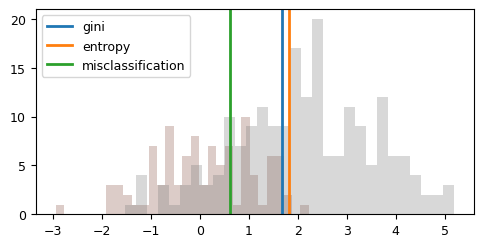

In [16]:
plt.hist(pts[labels==0], bins=30, color='C5', alpha=0.3)
plt.hist(pts[labels==1], bins=30, color='C7', alpha=0.3)

for i, (measure, values) in enumerate(measures.items()):
    plt.axvline(pts[np.argmax(values)], label=measure, lw=2, c=f"C{i}")

plt.legend()
plt.show()

Gini impurity and entropy both do a good job at splitting the data, so that to the right of the split, almost all of the points are of class 1.

### (c)

In [17]:
# load the dijet data
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')

# shuffle the data
idx = np.random.permutation(len(labels))
features = features[:, idx]
labels = labels[idx]

# split the data into test and validation
features_test = features[:, :200]
features_val = features[:, 200:400]
features_train = features[:, 400:]
labels_test = labels[:200]
labels_val = labels[200:400]
labels_train = labels[400:]

In [18]:
from sklearn.ensemble import RandomForestClassifier

for n_trees in [5, 10, 20, 100]:
    for criterion in ["gini", "entropy"]:
        for depth in [2, 5, 10, None]:
            tree = RandomForestClassifier(n_estimators=n_trees,
                                          criterion=criterion,
                                          max_depth=depth)

            tree.fit(features_train.T, labels_train)

            score = tree.score(features_val.T, labels_val)
            print(f"{n_trees=}, {criterion=}, {depth=}: {score}")

n_trees=5, criterion='gini', depth=2: 0.765
n_trees=5, criterion='gini', depth=5: 0.81
n_trees=5, criterion='gini', depth=10: 0.775
n_trees=5, criterion='gini', depth=None: 0.77
n_trees=5, criterion='entropy', depth=2: 0.755
n_trees=5, criterion='entropy', depth=5: 0.775
n_trees=5, criterion='entropy', depth=10: 0.72
n_trees=5, criterion='entropy', depth=None: 0.77
n_trees=10, criterion='gini', depth=2: 0.755
n_trees=10, criterion='gini', depth=5: 0.805
n_trees=10, criterion='gini', depth=10: 0.81
n_trees=10, criterion='gini', depth=None: 0.79
n_trees=10, criterion='entropy', depth=2: 0.77
n_trees=10, criterion='entropy', depth=5: 0.815
n_trees=10, criterion='entropy', depth=10: 0.805
n_trees=10, criterion='entropy', depth=None: 0.755
n_trees=20, criterion='gini', depth=2: 0.72
n_trees=20, criterion='gini', depth=5: 0.81
n_trees=20, criterion='gini', depth=10: 0.8
n_trees=20, criterion='gini', depth=None: 0.835
n_trees=20, criterion='entropy', depth=2: 0.785
n_trees=20, criterion='entr

The best validation score of 0.845 is achieved with 100 trees, a maximum depth of 10, and entropy as critertoin (though the difference to other configurations is small).

In [19]:
tree = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=10)
tree.fit(features_train.T, labels_train)

score = tree.score(features_test.T, labels_test)
print(f"Test score: {score}")

Test score: 0.76
